In [1]:
#All the libraries I need. Note seaborn and Basemap are not in anaconda (Jupyter), and need to be installed.

%matplotlib inline
import pandas as pd #pandas is a useful array/matrix/spreadsheet maipulator. But it has some unique language
import numpy as np #math stuff!
import matplotlib.pyplot as plt #plotting package.
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7A48-729A

 Directory of C:\Users\KLK\Kaggle Codes\SanFranCrime

05/21/2016  08:08 PM    <DIR>          .
05/21/2016  08:08 PM    <DIR>          ..
05/21/2016  08:06 PM    <DIR>          .ipynb_checkpoints
05/19/2016  04:10 PM        75,051,678 sampleSubmission.csv
05/21/2016  11:24 AM         1,808,646 san-francisco-transit-map.gif
05/21/2016  05:38 PM             2,289 SanFranCord.png
05/21/2016  08:04 PM         1,326,455 SanFranCrime.ipynb
05/21/2016  05:36 PM           146,230 SanFranMap.png
05/20/2016  07:41 PM         7,230,886 sf_map_copyright_openstreetmap_contributors.txt
05/21/2016  08:08 PM             1,230 SFcrime.ipynb
05/19/2016  04:10 PM        90,996,610 test.csv
05/21/2016  07:22 PM             1,856 test.png
05/21/2016  11:18 AM             1,856 TestTHEFT_density_plot.png
05/19/2016  04:09 PM       127,433,651 train.csv
              11 File(s)    304,001,387 bytes
               3 Dir(s)  231,053,770,752 by

In [3]:
SA_train=pd.read_csv('train.csv', header=0) #Import the training data

In [4]:
#Let's look at just the top crime categories:
pd.value_counts(SA_train['Category'])[0:10]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

In [6]:
#To have script run quickly, we'll only use a subset of the training data:
testTrain=SA_train[1:1000]

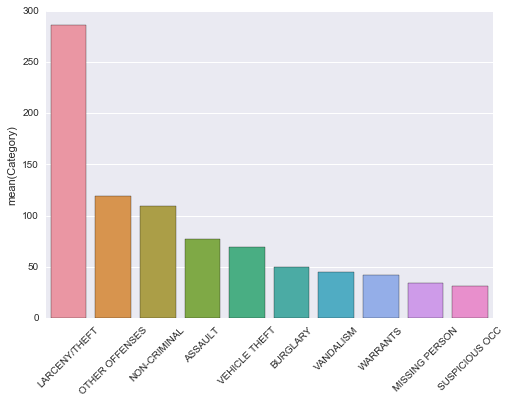

In [7]:
#We can do some pretty mapping of this:
test=testTrain['Category'].value_counts()[0:10]
test2=sns.barplot(x=test.index, y=test)
for item in test2.get_xticklabels():
    item.set_rotation(45)

In [8]:
#The first problem I want to tackle is raw mapping of each crime to a map of the city
SA_train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [ ]:
#Note from above we can see there are errors in the longitude and latitude data.
#A max of 90 in Y is not mappable. and the max in X is also not in SF.
#We'll deal with that in the future. But for now, I just want to get the data mapped.

In [9]:
#To start, let's just look at the LARCENY/THEFT part
testTHEFT=testTrain[testTrain['Category']=='LARCENY/THEFT']

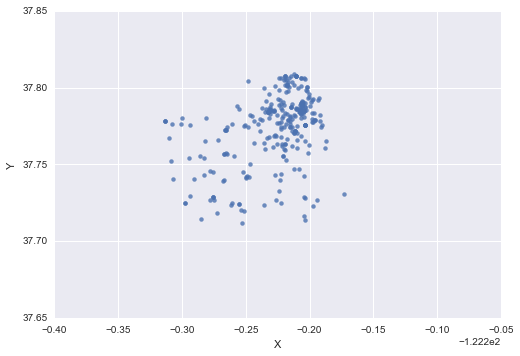

In [10]:
#plotting this, we can start to see the outline of SF:
sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False)

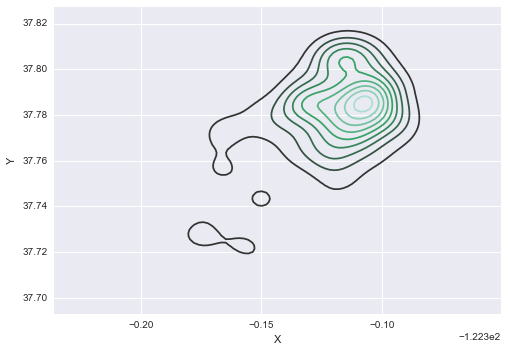

In [11]:
#And make other plots with seaborn that are pretty:
sns.kdeplot(testTHEFT.X, testTHEFT.Y)

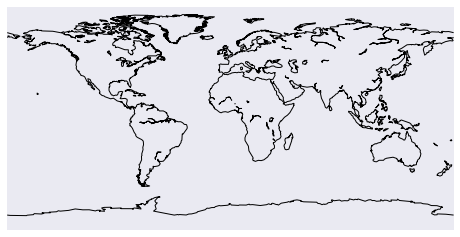

In [12]:
#But we would really like to have a background of SF to make that easier to visualize
#One option is basemap:
map = Basemap()
map.drawcoastlines()
plt.show()

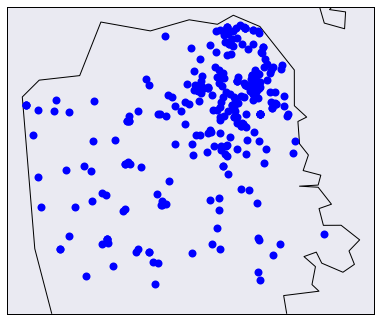

In [13]:
#Here we have SF. the longitude and latitude coordinates of each corner is listed below (llcrnlon, etc)
map = Basemap(projection='merc',
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.5226, urcrnrlat=37.8152, urcrnrlon=-122.3496, 
            llcrnrlat=37.7007)
map.drawcoastlines()
#map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
lon=testTHEFT['X'].values;
lat=testTHEFT['Y'].values;
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=8)

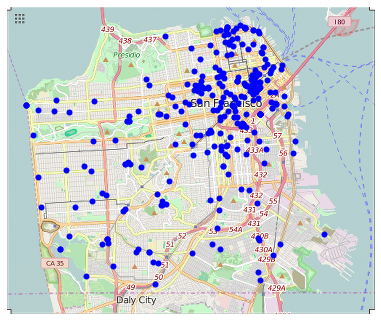

In [16]:
#Here's another way of doing this, importing a png of SF for the background.
#The png was screen grabbed from here: http://www.openstreetmap.org/export#map=12/37.7525/-122.4183
#Latitude and longitude region of png established in Basemap.
m = Basemap(llcrnrlon=-122.5226, urcrnrlat=37.8152, urcrnrlon=-122.3496, 
            llcrnrlat=37.7007,
        resolution='h', projection='merc')
im = plt.imread('SanFranMap.png')
m.imshow(im, interpolation='lanczos', origin='upper')
lon=testTHEFT['X'].values;
lat=testTHEFT['Y'].values;
x,y = map(lon, lat)
m.plot(x, y, 'bo', markersize=6)
plt.show()

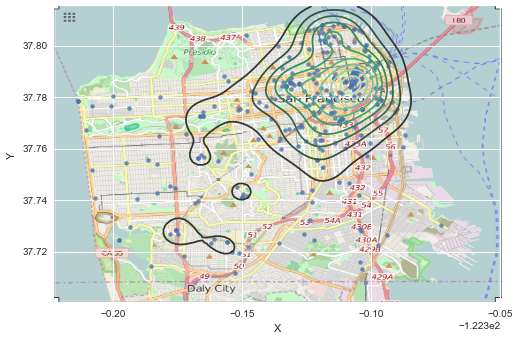

In [17]:
#Here I'm using ideas from https://www.kaggle.com/dbennett/sf-crime/test-map/code
#I'm importing the png, setting the correct lat and longitude, and plotting scatter and contour plots.

im = plt.imread('SanFranMap.png')

lon_lat_box = (-122.5226, -122.3496, 37.7007, 37.8152);
clipsize = [[-122.5226, -122.3496],[ 37.7007, 37.8152]];

plt.figure(figsize=(8,8))
ax = sns.kdeplot(testTHEFT.X,testTHEFT.Y,clip=clipsize) #contour plot
ax = sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False) #scatter plot
ax.imshow(im,cmap=plt.get_cmap('gray'),extent=lon_lat_box)

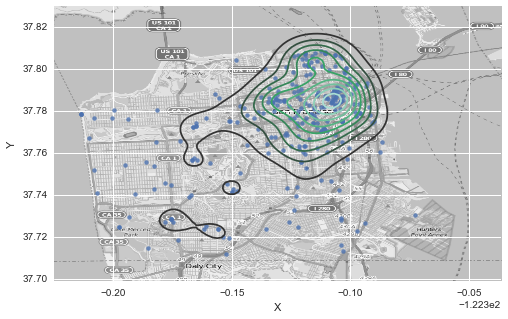

In [18]:
#I can do similar work using the SF data from the Kaggle competitor mentioned at the top
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt");
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1];
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299);
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]];
plt.figure(figsize=(8,8*asp))
ax = sns.kdeplot(testTHEFT.X, testTHEFT.Y, clip=clipsize, aspect=1/asp)
ax=sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False)
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)